In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("data.csv")
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


In [48]:
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


In [49]:
# nombre d'exemples
df.shape[0]

9582

In [50]:
# valeurs manquantes
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [51]:
df["Metier"].unique()

array(['Data scientist', 'Data architecte', 'Lead data scientist',
       'Data engineer', nan], dtype=object)

Les colonnes Entreprise, Metier et Experience possèdent des valeurs nulles. On va essayer de résoudre ce problème en commençant par la colonne Experience.

In [52]:
# Experience de String a Float pour pouvoir calculer la mediane et la moyenne
df['Experience'] = df['Experience'].str.replace(',','.')
df["Experience"] = df["Experience"].astype(float)

In [53]:
med = df["Experience"].median()
moy = df["Experience"].mean()
print(moy)
print(med)

2.8141863406408096
2.0


In [54]:
df.loc[
    (df['Metier'] == "Data scientist") & (df['Experience'].isnull()),
    "Experience"
    ] = med
df.loc[
    (df['Metier'] == "Data engineer") & (df['Experience'].isnull()),
    "Experience"
    ] = moy
df.loc[(df['Metier'] == "Lead data scientist") & (df['Experience'].isnull()),
       "Experience"
      ] = med
df.loc[(df['Metier'] == "Data architecte") & (df['Experience'].isnull()),
       "Experience"
      ] = med

df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


In [11]:
# valeurs manquantes
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
dtype: int64

On elimine les lignes contenant des valeurs manquantes aux colonnes Entreprise et Metier.

In [12]:
# Supprimer les valeurs manquantes d'Entreprise et Metier
df = df.dropna()

In [13]:
# valeurs manquantes
df.isnull().sum()

Entreprise      0
Metier          0
Technologies    0
Diplome         0
Experience      0
Ville           0
dtype: int64

In [14]:
moy_ds = df.loc[df["Metier"]=="Data scientist",["Experience"]].mean()[0]
moy_lds = df.loc[df["Metier"]=="Lead data scientist",["Experience"]].mean()[0]
moy_de = df.loc[df["Metier"]=="Data engineer",["Experience"]].mean()[0]

print(moy_ds)
print(moy_lds)
print(moy_de)

2.241839378238342
3.928513071895425
2.984756178750669


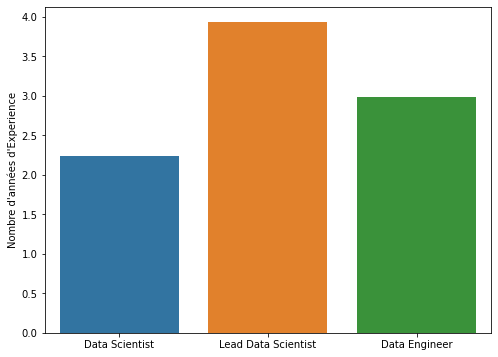

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=["Data Scientist","Lead Data Scientist","Data Engineer"],
            y=[moy_ds,moy_lds,moy_de])
ax.set(ylabel="Nombre d'années d'Experience")
plt.show()

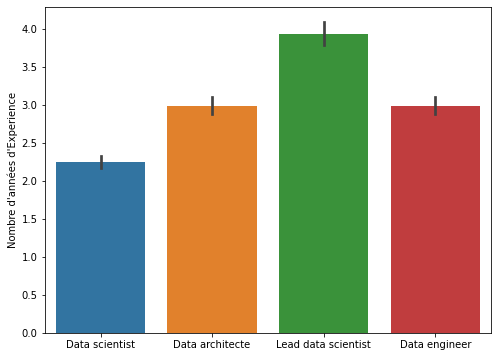

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="Metier",
            y="Experience",
            data=df)
ax.set(ylabel="Nombre d'années d'Experience",xlabel='')
plt.show()

On définit les niveaux comme suit :
<ul>
    <li>débutant : Entre 0 et 1 an</li>
    <li>confirmé : Entre 2 et 4 ans</li>
    <li>avancé : Entre 5 et 9 ans</li>
    <li>expert : 10+ ans</li>
</ul>

In [18]:
category = pd.qcut(
                  df.Experience, 
                  q=4,
                  labels=["Junior","Confirmé","Avancé","Expert"],
                 )

In [19]:
# Ajout de la colonne Exp_label
df["Exp_label"] = category
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Junior
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Avancé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Avancé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Confirmé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Confirmé


In [20]:
# Les 5 technologies les plus utilisées
x = df["Technologies"].value_counts()
x[0:5]

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    454
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          249
Hadoop/Hive/Vertica/Tableau                           246
Name: Technologies, dtype: int64

<AxesSubplot:>

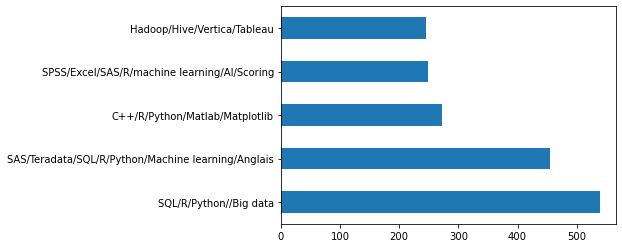

In [21]:
# Graphe des 5 technologies les plus utilisées
x[0:5].plot(kind="barh")

## Clustering

Pour effectuer le clustering , on utilisera le modèle le plus intuitif : kmeans. Avant cela, faisant une petite representation graphiques de ce qu'on possède déjà.

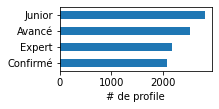

In [22]:
plt.subplot(324),
ax = df['Exp_label'].value_counts().plot(kind='barh')
plt.xlabel("# de profile")
ax.invert_yaxis()

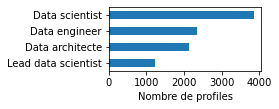

In [23]:
plt.subplot(326),
ax = df['Metier'].value_counts().plot.barh()
plt.xlabel("Nombre de profiles")
ax.invert_yaxis()

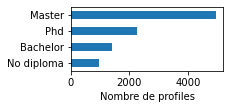

In [53]:
plt.subplot(325),
ax = df['Diplome'].value_counts().plot(kind='barh')
plt.xlabel("Nombre de profiles")
ax.invert_yaxis()

In [58]:
df = df.dropna()

In [59]:
df.isnull().sum()

Entreprise      0
Metier          0
Technologies    0
Diplome         0
Experience      0
Ville           0
dtype: int64

Commençant la partie modélisation

On doit d'abord faire l'encodage de nos données qui ne sont pas sous forme numérique.

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,1075,2,27,1,2,8
1,797,0,34,1,7,4
2,401,3,51,1,7,6
3,99,2,2,1,3,4
4,120,2,26,3,4,0


In [64]:
# df = df.drop(columns=["Entreprise"])
df

,Metier,Technologies,Diplome,Experience,Ville
0,2,27,1,2,8
1,0,34,1,7,4
2,3,51,1,7,6
3,2,2,1,3,4
4,2,26,3,4,0
...,...,...,...,...,...
9577,2,1,1,3,3
9578,2,9,1,16,13
9579,2,48,1,2,8
9580,2,37,1,20,9


On fait du feature Scaling pour accélerer l'entrainement

In [66]:
# feature scaling
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)
df_scaled.head()

,Metier,Technologies,Diplome,Experience,Ville
0,0.576772,-0.172656,-0.424963,-0.815286,0.557562
1,-1.478806,0.240301,-0.424963,0.380143,-0.505872
2,1.604561,1.243197,-0.424963,0.380143,0.025845
3,0.576772,-1.647502,-0.424963,-0.576200,-0.505872
4,0.576772,-0.231649,1.568498,-0.337114,-1.569307


In [68]:
# On entraine le kmeans pour differentes valeurs de k
from sklearn.cluster import KMeans

inertias = []
indexes = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,max_iter=1000)
    kmeans.fit(df_scaled)
    labels_ = kmeans.labels_
    inertia_ = kmeans.inertia_
    inertias.append(inertia_)
    indexes.append(k)

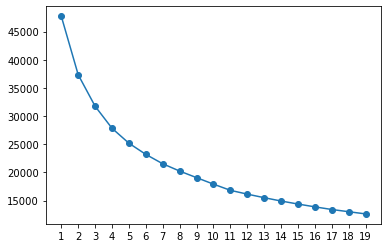

In [69]:
plt.scatter(indexes,inertias)
plt.plot(indexes,inertias)
plt.xticks(np.arange(1,20,1))
plt.show()

On choisit 2 clusters pour l'instant. On verra ce que cela donne au niveau des résultats

In [70]:
kmeans = KMeans(n_clusters=6,max_iter=1000)
kmeans.fit(df_scaled)
labels_ = kmeans.labels_
inertia_ = kmeans.inertia_
    
inertia_

23190.545138004243

L'inertia est assez grande ce qui montre que les résultats ne sont pas fameux. On verra quand même ce que cela donne.

<AxesSubplot:xlabel='Metier_enc', ylabel='Experience'>

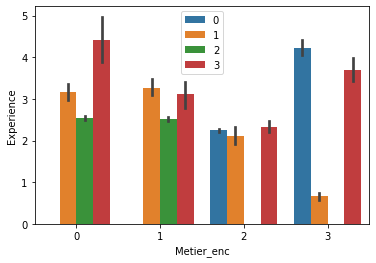

In [83]:
sns.barplot(
    x='Technologies',
    y='Experience',
    data=df_enc,hue=labels_
)

<AxesSubplot:xlabel='Diplome_enc', ylabel='Experience'>

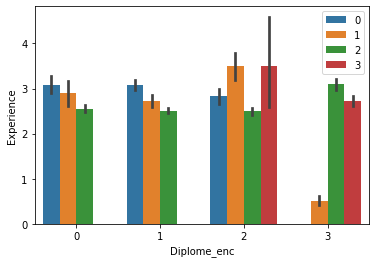

In [84]:
sns.barplot(
    x='Diplome_enc',
    y='Experience',
    data=df_enc,hue=labels_
)

<AxesSubplot:xlabel='Metier_enc', ylabel='Experience'>

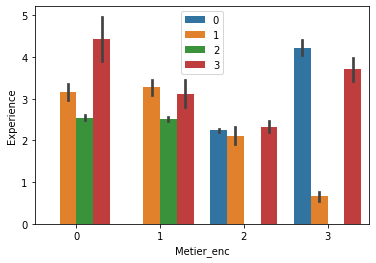

In [85]:
sns.barplot(
    x='Metier_enc',
    y='Experience',
    data=df_enc,hue=labels_
)

In [86]:
# sns.scatterplot(
#     x='Entreprise_enc',
#     y='Experience',
#     data=df_enc,hue=labels_
# )

<AxesSubplot:ylabel='Technologies'>

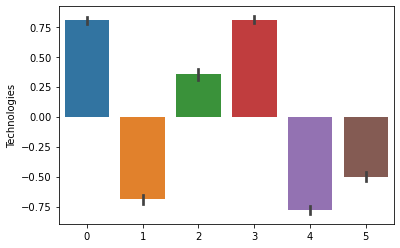

In [72]:
sns.barplot(
    x=labels_,
    y=df_scaled['Technologies']
)

C'est clair qu'un cluster represente les jeunes profils dans chaque métier, et l'autre représente les profils plus expérimenté.

Cluster 1 : Celui des jeunes profils

Cluster 2 : Celui des profils plus expérimentés.

## Prédiction des valeurs manquantes

On prépare notre dataset comme tout à l'heure en enlevant les valeurs manquantes

In [39]:
#Notre dataset
df = pd.read_csv("data.csv")

# Liste des metiers
metiers = df["Metier"].unique()
metiers = metiers[0:-1]
metiers

array(['Data scientist', 'Data architecte', 'Lead data scientist',
       'Data engineer'], dtype=object)

In [40]:
# Conversion d'Experience de String a Float
df['Experience'] = df['Experience'].str.replace(',','.')
df["Experience"] = df["Experience"].astype(float)

In [41]:
med = df["Experience"].median()
moy = df["Experience"].mean()
print(moy)
print(med)

2.8141863406408096
2.0


In [42]:
df.loc[
    (df['Metier'] == "Data scientist") & (df['Experience'].isnull()),
    "Experience"
    ] = med
df.loc[
    (df['Metier'] == "Data engineer") & (df['Experience'].isnull()),
    "Experience"
    ] = moy
df.loc[(df['Metier'] == "Lead data scientist") & (df['Experience'].isnull()),
       "Experience"
      ] = med
df.loc[(df['Metier'] == "Data architecte") & (df['Experience'].isnull()),
       "Experience"
      ] = med

df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


In [43]:
df.dropna(subset=['Entreprise'],inplace=True)

In [44]:
df.isnull().sum()

Entreprise       0
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
dtype: int64

On va essayer maintenant de séparer nos données. Les lignes non nulles feront partie de nos données d'entrainement ou de validation, et les lignes où le métier manque seront gardé de coté dans ce qu'on appelera testset et qu'on utilisera vers la fin.

In [15]:
#Séparation en train/test set
mask_metier = df.loc[:, 'Metier'].isna()

set_to_predict = df[mask_metier].drop(["Metier"],axis=1)
df_lr = df[~mask_metier]

set_to_predict.head()

,Entreprise,Technologies,Diplome,Experience,Ville
346,Jacobs,Python/Spark/GNU/Linux,No diploma,2.5,Paris
2058,Ball Aerospace,VBA/Python/Excel/R,Master,15.0,Lyon
2670,"eHire, LLC",Java/C/C++/R/Python,Master,1.5,Toulouse
2899,Norfolk Southern Corp,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble
3346,J.E. Ranta Associates,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes


In [16]:
df_lr.isnull().sum()

Entreprise      0
Metier          0
Technologies    0
Diplome         0
Experience      0
Ville           0
dtype: int64

In [28]:
df_lr["Technologies"].unique()

array(['Matlab/Python/Pyspark/Scikit-learn/Tensorflow',
       'Python/Java/Scala/MongoDB',
       'SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-learn',
       'C/C++/Java/Python',
       'Matlab/Python/C++/numpy/Tensorflow/scikit-learn',
       'VBA/Python/Excel/R', 'Excel/VBA/R/Python/PySpark',
       'Java/C/C++/R/Python', 'Java/Linux/Docker',
       'Python/Java/Linux/GNU', 'Hadoop/Hive/SQL/MariaDB',
       'Python/R/machine learning/Excel/VBA/C++',
       'Python/Spark/Hive/Hadoop', 'Python/AWS/Docker',
       'Python/Tensorflow/scikit-learn/Deep learning/R',
       'Python/Pyspark/Spark',
       'Docker/PostgreSQL/Elasticsearch/Kibana/MongoDB',
       'R/machine learning/Excel/VBA', 'Elasticsearch/Kibana/MongoDB',
       'Java/Hadoop/HDFS/Yarn',
       'Python/Pyspark/machine learning/Microsoft Azure',
       'Elasticsearch/Kibana/Redshift',
       'SAS/Teradata/SQL/R/Python/Machine learning/Anglais',
       'Excel/Python/Matlab/R/machine learning/anglais',
       'SPSS/Excel/SAS

In [ ]:
def change_technology(technologies,modification):
    df_lr.loc[set(np.char.lower(technologies)).
              issubset(np.char.lower(df_lr["Technologies"])),"Technologies"] = modification


change_technology(['Python',''])


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_lr = df_lr.apply(le.fit_transform)
df_lr.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,1075,2,27,1,2,8
1,797,0,34,1,7,4
2,401,3,51,1,7,6
3,99,2,2,1,3,4
4,120,2,26,3,4,0


Le modèle qu'on va utilisé pour la classification est le modèle de regression logistique. On l'a choisi car il est simplice, polyvalent et direcct.

On va à présent encoder nos valeurs pour les préparer à être utilisé par le modèle de classification.

In [30]:
df_lr.drop(columns=["Entreprise"])

,Metier,Technologies,Diplome,Experience,Ville
0,2,27,1,2,8
1,0,34,1,7,4
2,3,51,1,7,6
3,2,2,1,3,4
4,2,26,3,4,0
...,...,...,...,...,...
9577,2,1,1,3,3
9578,2,9,1,16,13
9579,2,48,1,2,8
9580,2,37,1,20,9


In [38]:
# feature scaling
df_lr = scaler.fit_transform(df_lr)
df_scaled = pd.DataFrame(df_scaled,columns = df_enc.columns)
df_scaled.head()

,0,1,2,3,4,5
0,1.054055,0.576772,-0.172656,-0.424963,-0.815286,0.557562
1,0.380047,-1.478806,0.240301,-0.424963,0.380143,-0.505872
2,-0.580051,1.604561,1.243197,-0.424963,0.380143,0.025845
3,-1.312247,0.576772,-1.647502,-0.424963,-0.576200,-0.505872
4,-1.261332,0.576772,-0.231649,1.568498,-0.337114,-1.569307
...,...,...,...,...,...,...
9541,0.380047,0.576772,-1.706496,-0.424963,-0.576200,-0.771731
9542,-0.863716,0.576772,-1.234545,-0.424963,2.531914,1.886856
9543,-1.171626,0.576772,1.066215,-0.424963,-0.815286,0.557562
9544,1.301353,0.576772,0.417283,-0.424963,3.488256,0.823421


In [31]:
# Sortie du modèle
y = le.fit_transform(df_lr['Metier'])
y

array([2, 0, 3, ..., 2, 2, 2])

On commence la modélisation.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, shuffle=True, random_state=25)

#Entrainement du modèle
LR = LogisticRegression(random_state=0, max_iter=3000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [126]:
#Prédiction sur les données de test
test_predictions = LR.predict(X_test)
test_predictions

array([2, 2, 2, ..., 2, 2, 2])

In [127]:
#Precision du modèle sur les données de test
print('Precision du modèle sur les données de test: {0:0.4f}'. format(accuracy_score(y_test, test_predictions)))

Precision du modèle sur les données de test: 0.4232


La précision n'est clairement pas assez grande. On verra ce que cela va donner.

In [128]:
#Prédiction sur les données d'entrainement
train_predictions = LR.predict(X_train)

#Precision du modèle sur les données d'entrainement
print('Precision du modèle sur les données d entrainement: {0:0.4f}'. format(accuracy_score(y_train, train_predictions)))

Precision du modèle sur les données d entrainement: 0.4023


<AxesSubplot:>

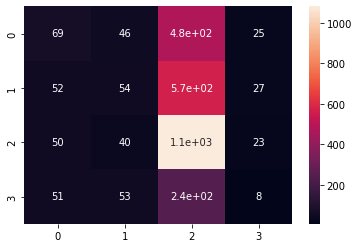

In [129]:
# Matrice de confusion
cm = pd.DataFrame(confusion_matrix(y_test, test_predictions),index=le.classes_,columns=le.classes_)
sns.heatmap(cm,annot=True)
# cm

On va essayer maintenant de predire les métiers manquants.

In [130]:
predictions = LR.predict(set_to_predict_enc)

# Décodage des valeurs de metier
set_to_predict["Metier"] = le.inverse_transform(predictions)
set_to_predict

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

Ces résultats ne semblent pas logiques puisqu'un Lead Data Scientist c'est en général des profils plus expérimentés, mais on a prédit beaucoup de profils juniors pour ce metier là.

Puisque ce modèle contient beaucoup d'erreurs, d'autres modèles de classification doivent être essayés.